# From Data to Viz

The purpose of this RECAP is to choose the right data visualization for a given question on a dataset.

(Freely inspired from https://www.data-to-viz.com/)

Let's start by running the following cell:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## A - Iris 🌸


Let's explore the Seaborn [**Iris**](https://github.com/mwaskom/seaborn-data/blob/master/iris.csv) dataset, quite known in the Machine Learning beginners community.

Here's a nice picture to get used to the vacobulary around those flowers:

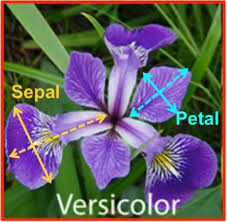

In [2]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


---

### ❓ 1 - Counting Species

How many different species are there in the dataset? Use a Seaborn plot to visualize their relative importance.

<AxesSubplot:xlabel='species', ylabel='count'>

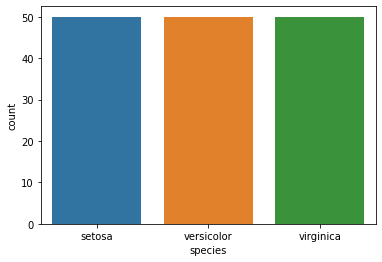

In [3]:
sns.countplot(x="species", data=iris_df)

---
### ❓ 2 - Petal Length distribution

Let's see if the petal distribution from the dataset is Normal or not. Use a Seaborn plot to visualize the distribution of the `petal_length` column of `iris_df`.

/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_length'>

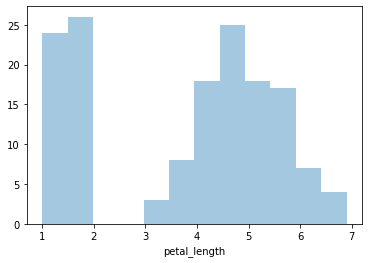

In [4]:
sns.distplot(iris_df['petal_length'], kde=False, bins=12)

---
### ❓ 3 - Relationships of Numerical variables

Let's use a Seaborn plot to quickly get a sense of the `(x, y)` relationship of all couples of numerical columns (`sepal_length` / `sepal_width`, `sepal_length` / `petal_length`, etc.). You should use a plot which will draw 16 subplots in one line of code!

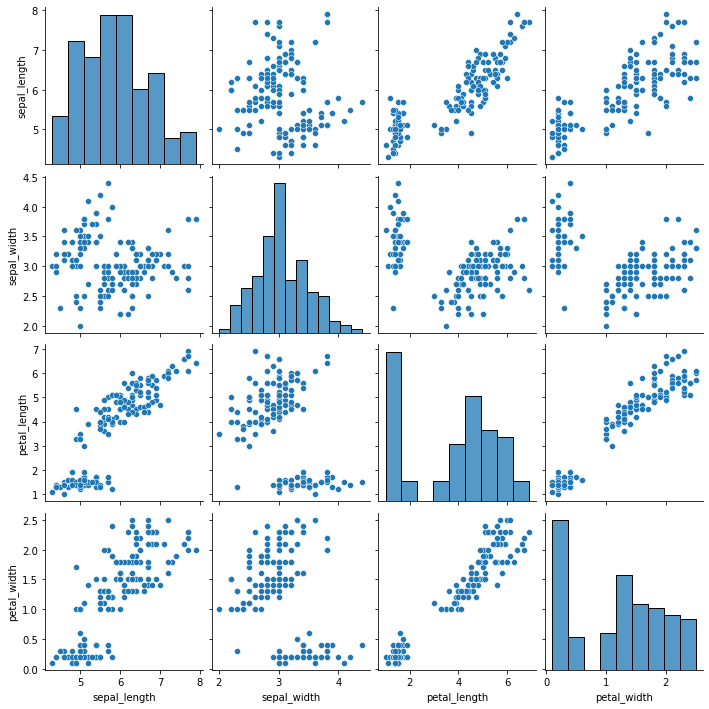

In [5]:
sns.pairplot(iris_df)

---

### ❓ 4 - Numerical + Categorical

We learned a lot about this sample of irises:
- `petal_length` seems to be an important dimension to identify irises
- some of their dimensions are correlated
- there are 3 species
 
How can you visualize the differences between the 3 species of irises with different colors? Using Seaborn, write some code to get scatterplots (we want to use the `species` as colors to better identify groups!).

/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>

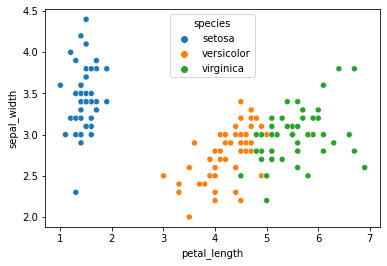

In [6]:
sns.scatterplot('petal_length', 'sepal_width', hue='species', data=iris_df)

/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

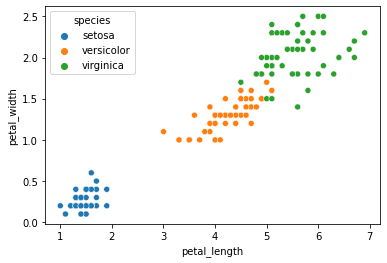

In [7]:
sns.scatterplot('petal_length', 'petal_width', hue='species', data=iris_df)

/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='petal_length'>

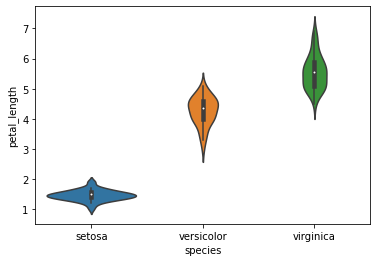

In [8]:
sns.violinplot('species','petal_length', data=iris_df)

---
## B - Maps 🗺

After a lockdown caused by a lethal virus, the population is authorized to move freely again.

😱 **But they can't go further than 100km from home**. How can you help this population to know where they can go?

For this second part of the RECAP, we are using the [`folium`](https://python-visualization.github.io/folium/) package, a wrapper around the [`Leaflet`](https://leafletjs.com/) JavaScript library.

In [9]:
!pip install --quiet folium

Now import Folium:

In [10]:
import folium

---

### ❓ 1 - Draw your first map

The goal of this first question is to:

- Draw a map centered at specific coordinates (check out [gps-coorinates.net](https://www.gps-coordinates.net/))
- Put a marker at that specific point
- Draw a circle of 100km centered at specific point

Check out the [`folium` Quickstart](https://python-visualization.github.io/folium/quickstart.html), you should find all the code examples you need, good luck!

In [11]:
coordinates = [48.8649224, 2.3800903] # 16 Villa Gaudelet, Paris

m = folium.Map(location=coordinates, zoom_start=8)
folium.Marker(coordinates, tooltip='Le Wagon Paris').add_to(m)
folium.Circle(coordinates, radius=100 * 1000).add_to(m)
m

---

### ❓ 2 - Build a User-Friendly tool

The problem of the previous code is that we need to manually convert an address into the GPS coordinates. Let's implement a program so that user can specify their plain text address and get the map drawn for that point:

```python
draw_100km_map("138 Kingsland Rd, London E2 8DY")
```

💡 Hint: You can use the [Nominatim Search API](https://nominatim.org/release-docs/latest/api/Search/) to implement a `geocode(address)` function which returns a list of `[lat, lng]` coordinates. 

In [12]:
import requests

def geocode(address):
    params = { "q": address, 'format': 'json' }
    places = requests.get(f"https://nominatim.openstreetmap.org/search", params=params).json()
    return [places[0]['lat'], places[0]['lon']]
    
def draw_100km_map(address):
    coordinates = geocode(address)
    m = folium.Map(location=coordinates, zoom_start=8)
    folium.Marker(coordinates, tooltip='Le Wagon Paris').add_to(m)
    folium.Circle(coordinates, radius=100 * 1000).add_to(m)
    return m

The interactive tool:

In [15]:
address = input()
draw_100km_map(address)

Marthod
